# Search: Solving a maze

Total Points: 10


The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

Here is the small example maze:

In [662]:
f = open("medium_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                 SX
X XXXXXXXXXXXXXXXXXXXXXXX XXXXXXXX X
X XX   X   X      XXXXXXX   XX     X
X XX X X X X XXXX XXXXXXXXX XX XXXXX
X XX X X X X             XX XX     X
X XX X X X X X XXXX  XXX    XXXXXX X
X X  X X X   X    XX XXXXXXXX      X
X XX X X XXXXXXXX XX        XX XXXXX
X XX X   XX       XXXXXXXXX XX     X
X    XXXXXX XXXXXXX      XX XXXXXX X
XXXXXX      X       XXXX XX X      X
X      XXXXXX XXXXX X    XX XX XXXXX
X XXXXXX      X       XXXXX XX     X
X        XXXXXX XXXXXXXXXXX XX  XX X
XXXXXXXXXX                  XXXXXX X
XG         XXXXXXXXXXXXXXXX        X
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX




__Notes:__ 
* This is a planing exercise, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.
* Tree search algorithm implementations that you find online have often a different aim. The algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 
* Some mazes may contain cycles and therefore not form proper trees unless cycles are prevented. 

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation.

In [663]:
%run maze_helper.py

maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(0,0):", maze[8, 1])


# there is also a helper function called `look(maze, pos)`
print("Position(8,1):", look(maze, [8, 1]))

Position(0,0): X
Position(0,0):  
Position(8,1):  


Visualize the maze

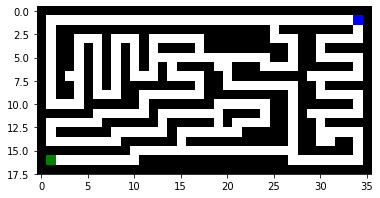

In [664]:
show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [665]:
print("Start location:", find_pos(maze, what = "S"))
print("Goal location:", find_pos(maze, what = "G"))

Start location: [1, 34]
Goal location: [16, 1]


## Tree structures

A basic tree implementation in Python is available at https://github.com/yoyzhou/pyTree (found by John Park).


# Tasks

Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Iterative deepening search (IDS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[empty maze](empty_maze.txt), 
[wall maze](wall_maze.txt), 
and the 
[loops maze](loops_maze.txt). 
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

* Initial state: Point S
* Actions: move from one point to another in the maze
* Transition model: If it move from one position to another, it ends up in the later location
    
* Goal state: Point G
* Path cost: number of points traversed

## Task 2: Breadth-first, Depth-first and iterative deepening search [4 points]

Implement these search strategies. You can implement a generic tree search following the BFS pseudo-code in your textbook and then just adapt the order in which the frontier is explored.

In [694]:
from pyTree.Tree import Tree as Tree
import random

def manhattan(curr, goal):
    x_diff = abs(goal[0]-curr[0])
    y_diff = abs(goal[1]-curr[1])
    
    return (x_diff + y_diff)
    
def expand(maze, pos):
    near_pos = [[pos[0],pos[1]+1],
                [pos[0],pos[1]-1],
                [pos[0]+1,pos[1]],
               [pos[0]-1,pos[1]]]
    
    random.shuffle(near_pos) #   add stochastic to DFS
    
    return([next_pos for next_pos in near_pos if look(maze, next_pos) != "X"])

def getPath(node):
    path = []
    path.append(node.data)
    
    # traverse backward
    while not node.isRoot():
        node = node.getParent()
        path.append(node.data)        
#         path.reverse()
        
    return(path)

def showPath(maze, path, reached):
    maze_temp = np.copy(maze)
   
    for [x,y] in path:
        if maze_temp[x,y] == " ":
            maze_temp[x,y] = "P" 
        
    for [x,y] in reached:
        if maze_temp[x,y] == " ":
            maze_temp[x,y] = "."
    
    show_maze(maze_temp)
    

expand(maze,find_pos(maze, what = "S"))
expand(maze,[3,6])
manhattan([8,5], find_pos(maze, what = "G"))



12

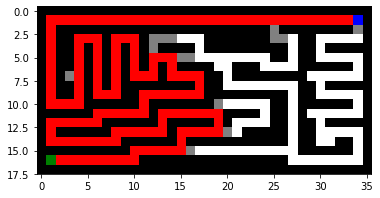

In [695]:
# def mazeSolver(maze,mode):
#     if mode = "IDS":
#         while True
#             result = 
#     else:
#         treeSearch(maze,mode)

def treeSearch(maze, mode= "BFS", depth=0, debug = False, show = False):
    # build the root of the tree
    start = find_pos(maze, what = "S")
    goal = find_pos(maze, what = "G")
    root = Tree(data = start)
    node = root
    
    # check show maze flat
    if show: maze_vis = np.copy(maze)
    
    #init frontier and reached
    frontier = []
    reached = []
    frontier.append(root)
    reached.append(root.data)
    
    while not len(frontier) <= 0:
        if debug: print("frontier:",[node.data for node in frontier])
            
        # choose the search strategy
        if mode == "BFS":
            node = frontier.pop(0)
        elif mode == "DFS":
            node = frontier.pop()
        elif mode == "GRE": 
            dis = [manhattan(n.data,goal) for n in frontier]
            shortest = dis.index(min(dis))
            if debug: print(shortest)
            node = frontier.pop(shortest)
        elif mode == "AST":
            # g(n) + h(n)
            dis = [len(getPath(n))+manhattan(n.data,goal) for n in frontier]
            shortest = dis.index(min(dis))
            if debug: print(shortest)
            node = frontier.pop(shortest)
            
        # check if goal
        if look(maze, node.data) == "G": 
            return ({"path": getPath(node),
                     "reached": reached})
        
        for pos in expand(maze,node.data):
#           DFS check cycle
                
            if not pos in reached:
                new_node = Tree(data = pos)
                node.addChild(new_node)
                frontier.append(new_node)
                reached.append(pos)
                
                if show: maze_vis[pos[0], pos[1]] = "."
        
        if show: show_maze(maze_vis)

    return(None) #fail
 
# print(len(maze_solver(maze, debug = False, show = False)))
output = treeSearch(maze,mode="GRE",debug = False, show = False)
showPath(maze, output["path"], output["reached"])

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each?

In [668]:
# Discussion

## Task 3: Greedy best-first search [2 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function.

In [669]:
# Your code goes here

Is this implementation complete and optimal? What is the time and space complexity?

In [670]:
# Discussion

## Task 4: A* Search [3 points]

Use again the Manhattan heuristic function.

In [671]:
# Your code goes here

Is this implementation complete and optimal? What is the time and space complexity?

In [672]:
# Discussion

Don't forget to add a table that compares the following for the algorithms on the different mazes:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

In [673]:
# Add table

## Bonus Tasks [+1 point]

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [674]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [675]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [676]:
# Your code/answer goes here